# State of the Union

## Word Usage with *tm*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
library(tm)

options(repr.plot.width = 16, repr.plot.height = 9, repr.matrix.max.rows = 10000, repr.matrix.max.cols = 10000)

Loading required package: NLP



## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
docs_df <- data.frame(doc_id=d$Speech, text=d$Text, d[, c("President", "Term", "Year")])

In [4]:
docs_ds <- DataframeSource(docs_df)

In [5]:
docs_c <- SimpleCorpus(docs_ds)
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 42

In [6]:
getTransformations()

[1] "removeNumbers"     "removePunctuation" "removeWords"      
[4] "stemDocument"      "stripWhitespace"

In [7]:
docs_c <- tm_map(docs_c, removeNumbers)
docs_c <- tm_map(docs_c, removePunctuation)
docs_c <- tm_map(docs_c, stripWhitespace)
docs_c <- tm_map(docs_c, content_transformer(tolower))
docs_c <- tm_map(docs_c, removeWords, c(stopwords(), "applause"))
docs_c

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 3
Content:  documents: 42

In [8]:
docs_dtm <- DocumentTermMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_dtm)

Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
“custom functions are ignored”


<<DocumentTermMatrix (documents: 42, terms: 11573)>>
Non-/sparse entries: 57026/429040
Sparsity           : 88%
Maximal term length: 33
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
             Terms
Docs               college    hussein         iraq       iraqi         must
  1981 Reagan 0.0000000000 0.00000000 0.0000000000 0.000000000 0.0006399371
  1986 Reagan 0.0000000000 0.00000000 0.0000000000 0.000000000 0.0010753779
  1987 Reagan 0.0000000000 0.00000000 0.0000000000 0.000000000 0.0006589535
  2003 GWBush 0.0000000000 0.02015805 0.0034554250 0.004675259 0.0006649874
  2007 GWBush 0.0000000000 0.00000000 0.0055134390 0.006660530 0.0006631543
  2017 Trump  0.0007782651 0.00000000 0.0000000000 0.000000000 0.0008017638
  2018 Trump  0.0002227552 0.00000000 0.0003219575 0.000000000 0.0002409551
  2019 Trump  0.0000000000 0.00000000 0.0006468305 0.000000000 0.0006569822
  2020 Trump  0.0001962774 0.00000000 0.0011347518 0.

In [9]:
docs_tdm <- TermDocumentMatrix(docs_c, control=list(weighting=weightTfIdf))

inspect(docs_tdm)

Warning message in TermDocumentMatrix.SimpleCorpus(docs_c, control = list(weighting = weightTfIdf)):
“custom functions are ignored”


<<TermDocumentMatrix (terms: 11573, documents: 42)>>
Non-/sparse entries: 57026/429040
Sparsity           : 88%
Maximal term length: 33
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
         Docs
Terms      1981 Reagan 1986 Reagan  1987 Reagan  2003 GWBush  2007 GWBush
  college 0.0000000000 0.000000000 0.0000000000 0.0000000000 0.0000000000
  hussein 0.0000000000 0.000000000 0.0000000000 0.0201580502 0.0000000000
  iraq    0.0000000000 0.000000000 0.0000000000 0.0034554250 0.0055134390
  iraqi   0.0000000000 0.000000000 0.0000000000 0.0046752594 0.0066605300
  must    0.0006399371 0.001075378 0.0006589535 0.0006649874 0.0006631543
  propose 0.0003714217 0.000000000 0.0008924042 0.0012007677 0.0005987288
  saddam  0.0000000000 0.000000000 0.0000000000 0.0184311484 0.0000000000
  soviet  0.0005578686 0.002763059 0.0067018725 0.0004508827 0.0000000000
  terror  0.0000000000 0.001699930 0.0000000000 0.0022191900 0.0018442270
  

In [10]:
# Find the terms with the highest tf-idf, that is most unique to their speech.

findFreqTerms(docs_tdm, lowfreq = 0.02)

[1] "companies"  "industry"   "inflation"  "must"       "oil"       
 [6] "propose"    "recovery"   "reduction"  "soviet"     "space"     
[11] "thats"      "welfare"    "regime"     "college"    "usa"       
[16] "revolution" "terrorists" "drugs"      "terror"     "kids"      
[21] "terrorist"  "border"     "hussein"    "iraq"       "saddam"    
[26] "iraqi"      "gun"        "qaida"      "iraqis"

## Visualizations

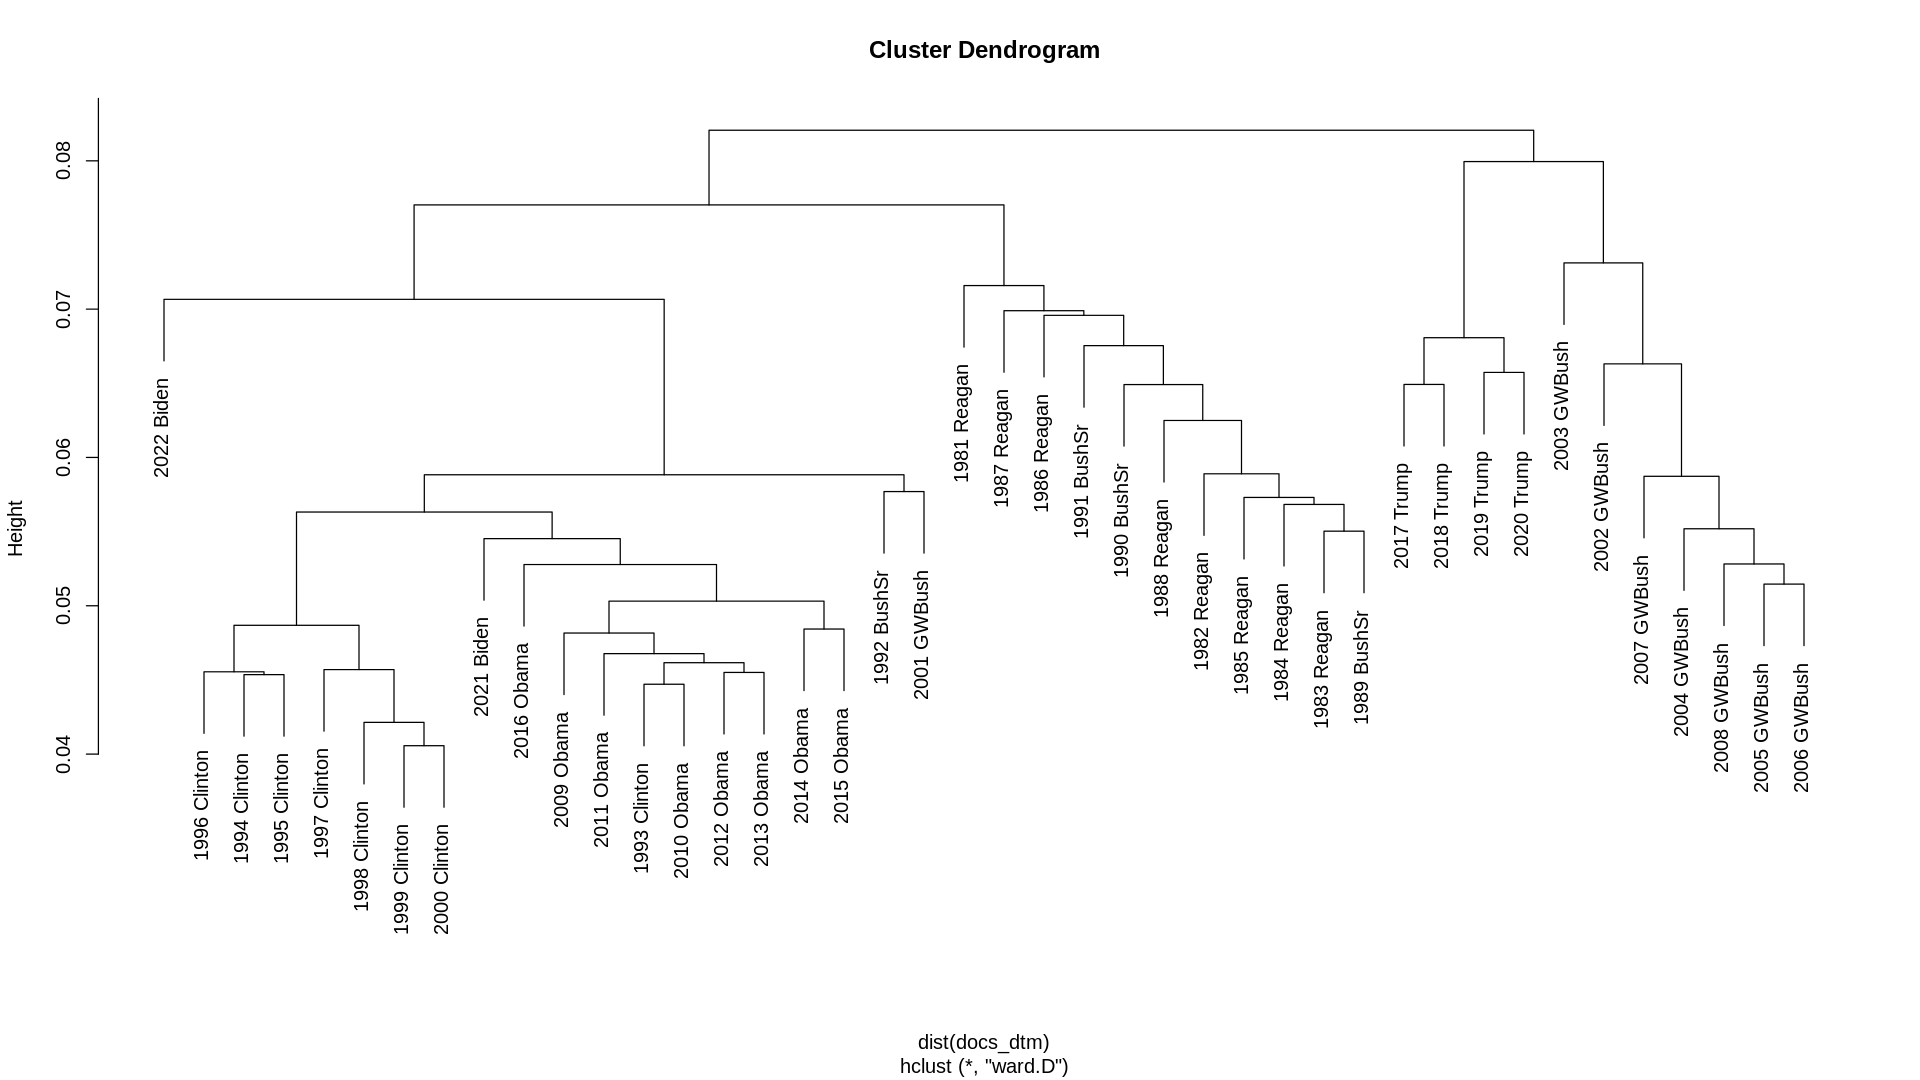

In [11]:
plot(hclust(dist(docs_dtm), method = "ward.D"))